In [7]:
# Python
import itertools
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import matplotlib.pyplot as plt 
from prophet.plot import plot_cross_validation_metric
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import funciones

In [8]:
df_main = pd.read_excel("https://raw.githubusercontent.com/carrenogf/MCD-Series-Temporales/main/dataset/series_diarias.xlsx")
df_main = df_main.sort_values("FECHA",ascending=True)
df_main.set_index("FECHA", inplace=True)
df_copa = df_main["CHU_COPA_AJUST"].dropna()
df_recprop = df_main["CHU_REC_PROPIOS_AJUST"].dropna()
df_regal = df_main["CHU_REGALIAS_AJUST"].dropna()
dataframes = [df_copa, df_recprop, df_regal]
for i in range(len(dataframes)):
  dataframes[i] = dataframes[i].reindex(pd.date_range(start=dataframes[i].index.min(), end=dataframes[i].index.max(), freq='B'))
  dataframes[i] = dataframes[i].fillna(0)
    
titulos = ["CHU_COPA_AJUST", "CHU_REC_PROPIOS_AJUST", "CHU_REGALIAS_AJUST"]

In [9]:
# TRAIN TEST
n_train = 0.9
train_copa = dataframes[0].iloc[:round(len(dataframes[0])*n_train)]
test_copa = dataframes[0].iloc[round(len(dataframes[0])*n_train):]
print(f"Coparticipacion: train({train_copa.shape}), test({test_copa.shape})")

train_recursos = dataframes[1].iloc[:round(len(dataframes[1])*n_train)]
test_recursos = dataframes[1].iloc[round(len(dataframes[1])*n_train):]
print(f"Recursos: train({train_recursos.shape}), test({test_recursos.shape})")

train_regalias = dataframes[2].iloc[:round(len(dataframes[2])*n_train)]
test_regalias = dataframes[2].iloc[round(len(dataframes[2])*n_train):]
print(f"Regalias: train({train_regalias.shape}), test({test_regalias.shape})")

dataframes_train = [ train_copa, train_recursos, train_regalias ]
dataframes_test = [ test_copa, test_recursos, test_regalias ]

Coparticipacion: train((1584,)), test((176,))
Recursos: train((1995,)), test((222,))
Regalias: train((1985,)), test((221,))


In [19]:
model.predict(future)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-02,2.244932e+06,-669003.795682,4.370992e+06,2.244932e+06,2.244932e+06,-362319.826042,-362319.826042,-362319.826042,-6981.790785,...,-108140.487985,-108140.487985,-108140.487985,-247197.547272,-247197.547272,-247197.547272,0.0,0.0,0.0,1.882612e+06
1,2018-01-03,2.244625e+06,-295740.561883,4.843847e+06,2.244625e+06,2.244625e+06,-55659.203630,-55659.203630,-55659.203630,-6981.790785,...,154114.889021,154114.889021,154114.889021,-202792.301866,-202792.301866,-202792.301866,0.0,0.0,0.0,2.188966e+06
2,2018-01-04,2.244318e+06,-227764.824909,4.710549e+06,2.244318e+06,2.244318e+06,8666.790204,8666.790204,8666.790204,-6981.790785,...,171271.691537,171271.691537,171271.691537,-155623.110547,-155623.110547,-155623.110547,0.0,0.0,0.0,2.252985e+06
3,2018-01-05,2.244011e+06,-241790.890588,4.897786e+06,2.244011e+06,2.244011e+06,6206.796065,6206.796065,6206.796065,-6981.790785,...,119699.595782,119699.595782,119699.595782,-106511.008932,-106511.008932,-106511.008932,0.0,0.0,0.0,2.250218e+06
4,2018-01-08,2.243090e+06,-709402.692045,4.526881e+06,2.243090e+06,2.243090e+06,-301984.030526,-301984.030526,-301984.030526,-6981.790785,...,-338690.922604,-338690.922604,-338690.922604,43688.682864,43688.682864,43688.682864,0.0,0.0,0.0,1.941106e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,2024-09-24,2.881273e+06,46619.465574,5.376678e+06,2.870376e+06,2.892725e+06,-90796.589145,-90796.589145,-90796.589145,-6981.790785,...,-108140.487985,-108140.487985,-108140.487985,24325.689625,24325.689625,24325.689625,0.0,0.0,0.0,2.790476e+06
1756,2024-09-25,2.881827e+06,504211.934660,5.675143e+06,2.870773e+06,2.893353e+06,170566.766427,170566.766427,170566.766427,-6981.790785,...,154114.889021,154114.889021,154114.889021,23433.668191,23433.668191,23433.668191,0.0,0.0,0.0,3.052394e+06
1757,2024-09-26,2.882382e+06,324626.675420,5.514598e+06,2.871118e+06,2.893978e+06,187320.341889,187320.341889,187320.341889,-6981.790785,...,171271.691537,171271.691537,171271.691537,23030.441138,23030.441138,23030.441138,0.0,0.0,0.0,3.069703e+06
1758,2024-09-27,2.882937e+06,334686.836801,5.772139e+06,2.871469e+06,2.894602e+06,135810.302502,135810.302502,135810.302502,-6981.790785,...,119699.595782,119699.595782,119699.595782,23092.497505,23092.497505,23092.497505,0.0,0.0,0.0,3.018748e+06


In [53]:
results_train_test = []
predictions_test = []
from prophet.make_holidays import make_holidays_df
best_params = pd.read_csv("prophet_best_params.csv")
best_fourier = pd.read_csv("best_fourier_orders.csv")

for i, df_train in enumerate(dataframes_train):
    df_train = df_train.to_frame()
    df_train.reset_index(inplace=True)
    df_train.columns = ["ds", "y"]
    df_test = dataframes_test[i]
    params = eval(best_params.iloc[i]["best_params"])
    year_list = dataframes[i].index.year.unique()
    holidays = make_holidays_df(year_list=year_list, country='AR')
    model = Prophet(**params,holidays=holidays)
    
    fourier_yearly = eval(best_fourier.iloc[i]["Fourier_yearly"])["fourier_order"]  
    fourier_monthly = eval(best_fourier.iloc[i]["Fourier_monthly"])["fourier_order"]
    model.add_seasonality(name='monthly', period=30.5, fourier_order=fourier_monthly)
    model.add_seasonality(name='yearly', period=365.25, fourier_order=fourier_yearly)

    model.fit(df_train)
    fechas = pd.date_range(start=df_test.index.min(), end=df_test.index.max(), freq='B')
    future = model.make_future_dataframe(periods=len(fechas), freq='B')
    pred_test = model.predict(future)
    pred_test.index = pred_test["ds"]
    pred_test = pred_test["yhat"]
    pred_test = pred_test[-len(df_test):]
    
    predictions_test.append(pred_test)
    # Cálculo del MSE en el conjunto de prueba
    mape_test = mean_absolute_percentage_error(df_test, pred_test)
    mape_mean = mean_absolute_percentage_error(df_test, [df_test.mean()] * len(df_test))
    mse_test = mean_absolute_percentage_error(df_test, pred_test)
    mae_test = mean_absolute_error(df_test, pred_test)
    rmse = np.sqrt(mean_squared_error(df_test, pred_test))
    results_train_test.append({
        "model": model,
        "name": titulos[i],
        "len_train": len(df_train),
        "len_test": len(df_test),
        "mape_test": mape_test,
        "mse_test":mse_test,
        "mape_mean": mape_mean,
        "mae_test": mae_test,
        "rmse": rmse
    })


15:47:26 - cmdstanpy - INFO - Chain [1] start processing
15:47:26 - cmdstanpy - INFO - Chain [1] done processing
15:47:27 - cmdstanpy - INFO - Chain [1] start processing
15:47:27 - cmdstanpy - INFO - Chain [1] done processing
15:47:28 - cmdstanpy - INFO - Chain [1] start processing
15:47:28 - cmdstanpy - INFO - Chain [1] done processing


,model,name,len_train,len_test,mape_test,mse_test,mape_mean,mae_test,rmse
0,<prophet.forecaster.Prophet object at 0x000002...,CHU_COPA_AJUST,1584,176,"958,736,396,893,261,004,800.00","958,736,396,893,261,004,800.00","758,549,686,672,395,206,656.00","1,536,613.57","2,196,124.08"
1,<prophet.forecaster.Prophet object at 0x000002...,CHU_REC_PROPIOS_AJUST,1995,222,"552,112,145,067,754,127,360.00","552,112,145,067,754,127,360.00","584,990,421,138,727,370,752.00","1,038,810.21","1,324,614.45"
2,<prophet.forecaster.Prophet object at 0x000002...,CHU_REGALIAS_AJUST,1985,221,"3,911,866,127,929,103,089,664.00","3,911,866,127,929,103,089,664.00","5,891,392,032,994,430,550,016.00","2,815,108.94","6,490,484.77"


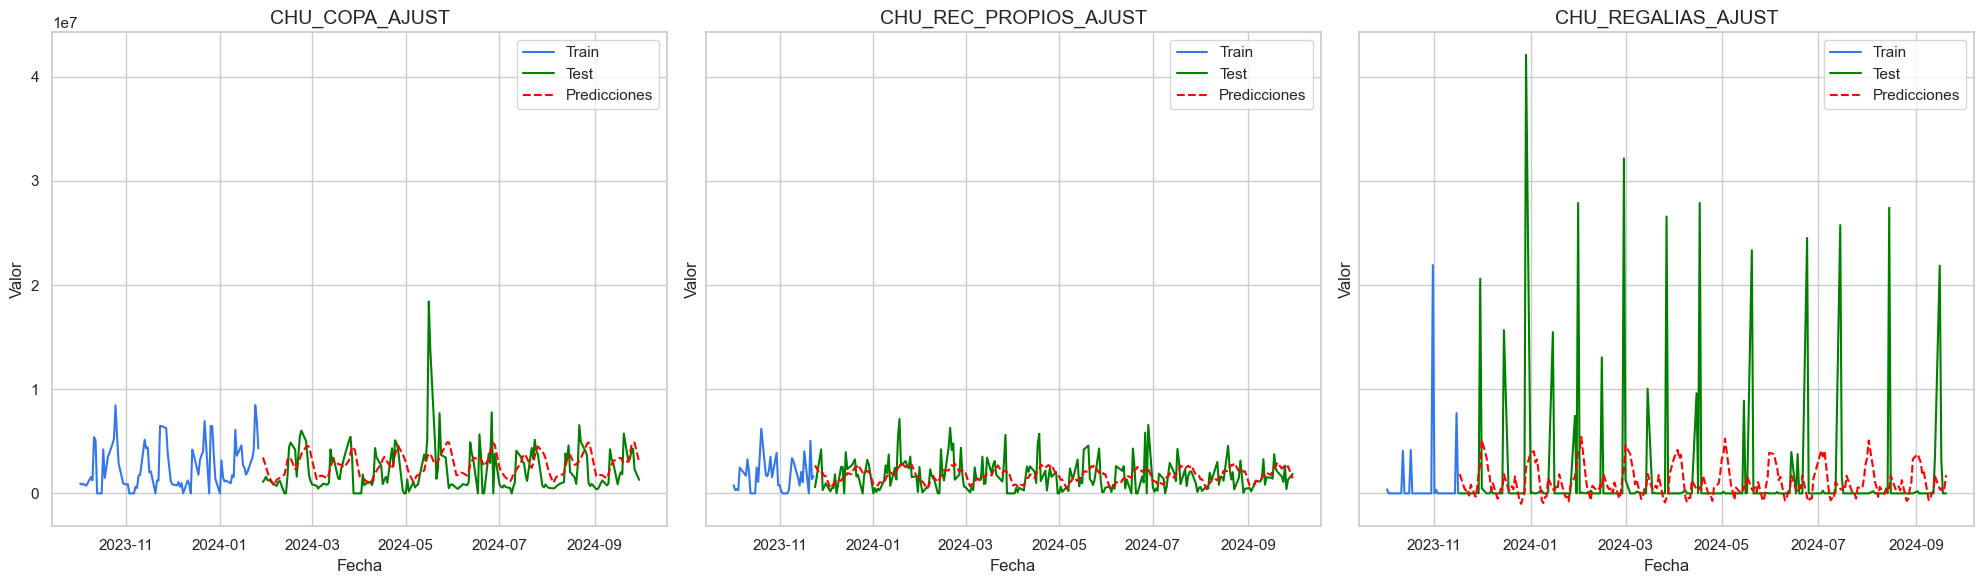

None

In [54]:
pd.options.display.float_format = '{:,.2f}'.format
display(pd.DataFrame(results_train_test))

display(funciones.plot_train_test_predictions(
    dataframes_train=dataframes_train,
    dataframes_test=dataframes_test,
    predictions_test=predictions_test,
    series_names=titulos,
    start_date='2023-10-01'
))